Text(0, 0.5, 'Y Distance (Meters)')

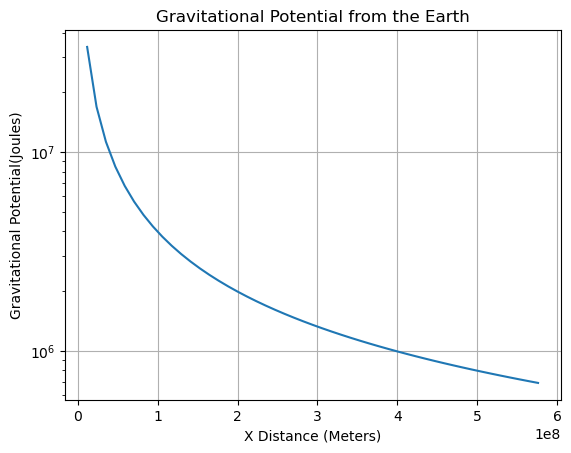

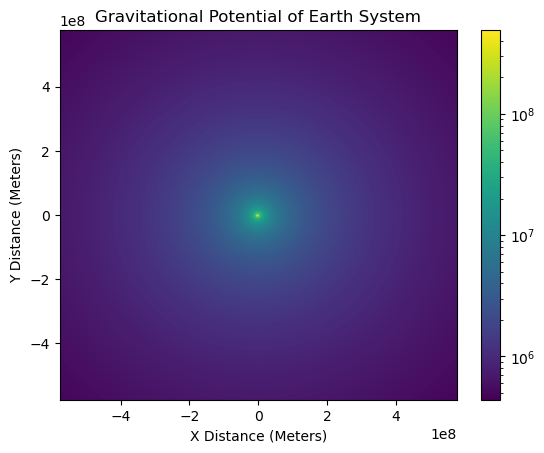

In [1]:
###Part 1

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib.colors import LogNorm

#note constants
G = const.G
d_moon = 384*10**6
M = 5.972*(10**24)

#create function for grav pot from earth
def f(xm, ym, M):
    
    r = np.sqrt(xm**2 + ym**2)
    mask = r== 0
    result = np.full_like(r,np.nan, dtype=float)

    result[~mask] = -(G*M)/(r[~mask])
    return result

x = np.linspace(0,(1.5*d_moon))
y = 0

#graph line of potential
fig, ax = plt.subplots()
ax.plot(x, abs((f(x,y,M))))
ax.set_yscale('log')
ax.set_title('Gravitational Potential from the Earth')
ax.set_xlabel("X Distance (Meters)")
ax.set_ylabel("Gravitational Potential(Joules)")
ax.grid(True)



x2 = np.linspace(-1.5*d_moon, 1.5*d_moon, 1000)
y2 = np.linspace(-1.5*d_moon, 1.5*d_moon, 1000)
X, Y = np.meshgrid(x2, y2)
Z = f(X, Y, M)

fig2, ax = plt.subplots()
mesh = ax.pcolor(X, Y, np.abs(f(X, Y, M)), norm=LogNorm(vmin=np.abs(Z.min()), vmax=np.abs(Z.max())))
cbar = fig2.colorbar(mesh, ax=ax)
ax.set_title('Gravitational Potential of Earth System')
ax.set_xlabel('X Distance (Meters)')
ax.set_ylabel('Y Distance (Meters)')

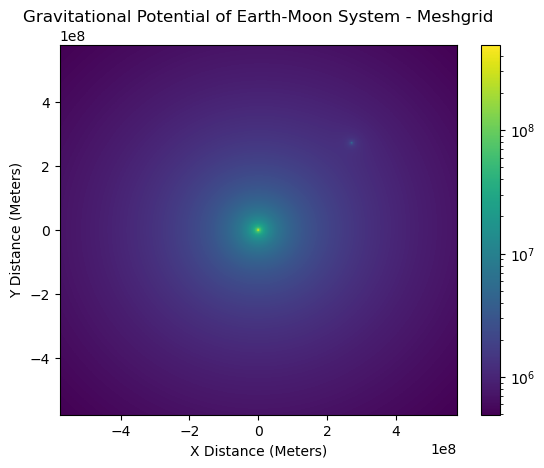

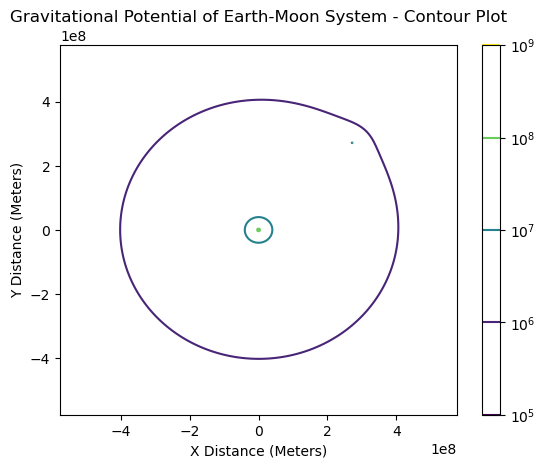

In [6]:
###Part 2
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib.colors import LogNorm

#note neccessary constants
d_moon = 384*10**6
M_erf = 5.98*10**24
M_moon = 7.35*10**22
G = const.G
x_moon = d_moon/np.sqrt(2)
y_moon = d_moon/np.sqrt(2)

#create function for grav pot of system (combo of gp from earth and gp from moon)
def f_syst(xm, ym):
    r_erf = np.sqrt(xm**2 + ym**2)
    r_moon = np.sqrt((xm-x_moon)**2 + (ym-y_moon)**2)

    r_moon = np.where(r_moon == 0, np.nan, r_moon)
    r_erf = np.where(r_erf == 0, np.nan, r_erf)

    result = (-(G*M_erf)/(r_erf)-(G*M_moon)/(r_moon))
    return result

#make space for function to live
x = np.linspace(-1.5*d_moon, 1.5*d_moon, 1000)
y = np.linspace(-1.5*d_moon, 1.5*d_moon, 1000)
X, Y = np.meshgrid(x, y)
Z = np.abs(f_syst(X, Y))

Z_filtered = Z[~np.isnan(Z)]
vmin, vmax = Z_filtered.min(), Z_filtered.max()

#plot function over given space in a meshgrid
fig, ax = plt.subplots()
mesh = ax.pcolormesh(X, Y, Z, cmap = 'viridis', norm = LogNorm(vmin =vmin, vmax = vmax))
cbar = fig.colorbar(mesh, ax=ax)

ax.set_title('Gravitational Potential of Earth-Moon System - Meshgrid')
ax.set_xlabel('X Distance (Meters)')
ax.set_ylabel('Y Distance (Meters)')

#plot contour plot
fig2, ax2  = plt.subplots()
contour = ax2.contour(X, Y, Z,  cmap = 'viridis',levels = 500, norm = LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar(contour, ax=ax2)
ax2.set_xlabel('X Distance (Meters)')
ax2.set_ylabel('Y Distance (Meters)')
ax2.set_title('Gravitational Potential of Earth-Moon System - Contour Plot')



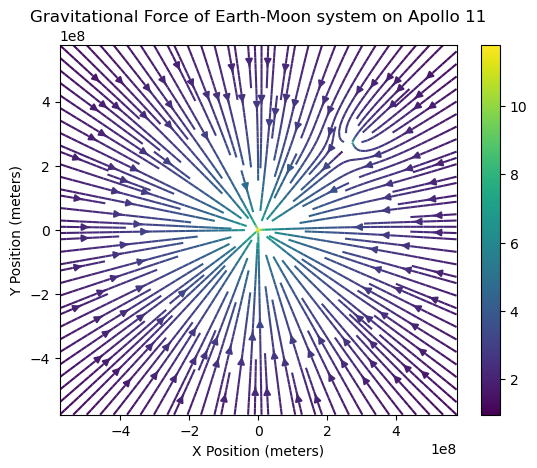

In [9]:
###Part 3

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib.colors import LogNorm

G = const.G

def f(m1, m2, x1, y1, x2, y2):
    m1 = input("Enter mass 1: ")
    m2 = input("Enter mass 2: ")
    x1 = input("Enter x coordinate 1: ")
    y1 = input("Enter y cooridinate 1: ")
    x2 = input("Enter x coordinate 2: ")
    y2 = input("Enter y coordinate 2: ")
    
    r = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    r_sq = r**2
    r_xhat = ((x2-x1)/r)
    r_yhat = ((y2-y1)/r)
    
    F_21 = -G*(m1*m2)/r_sq
    
    F_x = F_21 * r_xhat
    F_y = F_21 * r_yhat
    return F_x, F_y

d_moon = 384*10**6
M_erf = 5.98*10**24
M_moon = 7.35*10**22
x_moon = d_moon/np.sqrt(2)
y_moon = d_moon/np.sqrt(2)
m = 5500 

def g(m, x, y):
    #solve for distance from earth avoiding r = 0
    r_erf = np.sqrt((x)**2 + (y)**2)
    r_erf = np.where(r_erf == 0, np.nan, r_erf)

    #distance squared = denominator
    r_erfsq = r_erf**2
    
    #directional unit vectors
    r_erfxhat = ((x)/r_erf)
    r_erfyhat = ((y)/r_erf)

    #solves for magnitude of Force of Grav from earth
    F_erf = -G*(M_erf*m)/r_erfsq

    #solves for directional Vectors of Force of earth grav
    F_erfx = F_erf * r_erfxhat
    F_erfy = F_erf * r_erfyhat

    #solve for distance from moon avoiding r = 0
    r_moon = np.sqrt((x_moon-x)**2 + (y_moon-y)**2)
    r_moon = np.where(r_moon == 0, np.nan, r_moon)

    #dist^2 = denom
    r_moonsq = r_moon**2

    #directional unit vectors
    r_moonxhat = ((x_moon - x)/r_moon)
    r_moonyhat = ((y_moon - y)/r_moon)

    #magnitude of force from moon grav
    F_moon = -G*(M_moon*m)/r_moonsq

    #directional vector force from moon grav
    F_moonx = F_moon * r_moonxhat
    F_moony = F_moon * r_moonyhat

    #sum of forces in x and y
    Fx = F_erfx - F_moonx
    Fy = F_erfy - F_moony
    
    return Fx, Fy

X = np.linspace(-1.5*d_moon, 1.5*d_moon, 200)
Y = np.linspace(-1.5*d_moon, 1.5*d_moon, 200)
X, Y = np.meshgrid(X, Y)
u, v = g(m, X, Y)



fig, ax =  plt.subplots()
stream = ax.streamplot(X, Y, u, v, color=np.log(np.hypot(u, v)), cmap='viridis', density = 2)
ax.set_xlabel("X Position (meters)")
ax.set_ylabel("Y Position (meters)")
ax.set_title("Gravitational Force of Earth-Moon system on Apollo 11")
plt.colorbar(stream.lines, ax=ax)


In [31]:
###Part 4
import numpy as np
from scipy.integrate import quad
m = 1.3 * 10**4      #Burn Rate of S-1C
m0 = 2.8 * 10**6     #Wet Mass of S-1C
mf = 7.5 * 10**5     #Dry Mass of S-1C
ve = 2.4 *10**3      #Exhuast Velocity
g = 9.81

#1
T = (m0 - mf)/(m)

#2
def v(t):
    result = (ve)*np.log(m0/(m0-(m*t))) - g*t
    return result

#3
altitude, error = quad(v, 0, T)
print("Total burn time:", T,"seconds")
print("Altitude at burnout:", altitude, 'meters')

Total burn time: 157.69230769230768 seconds
Altitude at burnout: 74093.98013366401 meters
